In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 KB 12.4 MB/s eta 0:00:00


# **Libraries**

In [3]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tld import get_tld, is_tld

# **Dataset**

In [7]:
od.download("https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset")

Skipping, found downloaded files in "./malicious-urls-dataset" (use force=True to force download)


In [8]:
data = pd.read_csv("/content/malicious-urls-dataset/malicious_phish.csv")
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [10]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [11]:
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

# **Features**

## kode jenis URL

In [12]:
rem = {"code": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['code'] = data['type']
data = data.replace(rem)

data

,url,type,code
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2


## nama domain

In [13]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

data['domain'] = data['url'].apply(lambda i: process_tld(i))

data

,url,type,code,domain
0,br-icloud.com.br,phishing,2,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org


## abnormal URL

In [14]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0


data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

data

,url,type,code,domain,abnormal_url
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,1
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0


## suspicious words

In [15]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

data['sus_words'] = data['url'].apply(lambda i: suspicious_words(i))

data

,url,type,code,domain,abnormal_url,sus_words
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,1,0
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0


## IP address

In [16]:
def ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

data['ip_address'] = data['url'].apply(lambda i: ip_address(i))

data

,url,type,code,domain,abnormal_url,sus_words,ip_address
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,1,0,0
...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0


## jumlah karakter dalam URL

In [17]:
def character(url):
    return len(str(url))

data['character'] = data['url'].apply(lambda i: character(i))

data

,url,type,code,domain,abnormal_url,sus_words,ip_address,character
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,0,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,1,0,0,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,1,0,0,235
...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,0,44
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,42
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,45


## jumlah angka dalam URL

In [18]:
def ndigit(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

data['digits']= data['url'].apply(lambda i: ndigit(i))

data

,url,type,code,domain,abnormal_url,sus_words,ip_address,character,digits
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,35,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,31,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,1,0,0,88,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,1,0,0,235,22
...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,39,12
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,0,44,7
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,42,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,45,0


## jumlah www

In [19]:
def nwww(url):
    url.count('www')
    return url.count('www')

data['www'] = data['url'].apply(lambda i: nwww(i))

data

,url,type,code,domain,abnormal_url,sus_words,ip_address,character,digits,www
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,0,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,35,1,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,31,1,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,1,0,0,88,7,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,1,0,0,235,22,0
...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,39,12,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,0,44,7,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,42,3,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,45,0,0


## jumlah dir

In [20]:
def ndir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

data['dir'] = data['url'].apply(lambda i: ndir(i))

data

,url,type,code,domain,abnormal_url,sus_words,ip_address,character,digits,www,dir
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,0,16,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,35,1,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,31,1,0,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,1,0,0,88,7,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,1,0,0,235,22,0,1
...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,39,12,0,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,0,44,7,0,4
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,42,3,1,4
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,45,0,0,2


## hostname

In [21]:
def lhostname(url):
    return len(urlparse(url).netloc)

data['hostname'] = data['url'].apply(lambda i: lhostname(i))

data

,url,type,code,domain,abnormal_url,sus_words,ip_address,character,digits,www,dir,hostname
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,0,16,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,35,1,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,31,1,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,1,0,0,88,7,1,1,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,1,0,0,235,22,0,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,39,12,0,3,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,0,44,7,0,4,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,42,3,1,4,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,45,0,0,2,0


## http?

In [22]:
def nhttp(url):
    return url.count('http')

data['http'] = data['url'].apply(lambda i : nhttp(i))

data

,url,type,code,domain,abnormal_url,sus_words,ip_address,character,digits,www,dir,hostname,http
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,0,16,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,35,1,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,31,1,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,1,0,0,88,7,1,1,21,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,1,0,0,235,22,0,1,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,39,12,0,3,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,0,44,7,0,4,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,42,3,1,4,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,45,0,0,2,0,0


# **Features & Prediction**

In [23]:
X = data[['abnormal_url','sus_words','ip_address','character','digits','www','dir','hostname','http']]
y = data["code"]

In [24]:
X.head()

,abnormal_url,sus_words,ip_address,character,digits,www,dir,hostname,http
0,0,0,0,16,0,0,0,0,0
1,0,0,0,35,1,0,2,0,0
2,0,0,0,31,1,0,3,0,0
3,1,0,0,88,7,1,1,21,1
4,1,0,0,235,22,0,1,23,1


# **Train test split**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# **Model building**

## Random Forest Classifier

0.9511129538771028
              precision    recall  f1-score   support

      benign       0.96      0.98      0.97     85565
  defacement       0.95      0.97      0.96     19319
    phishing       0.89      0.79      0.84     18805
     malware       0.97      0.92      0.94      6550

    accuracy                           0.95    130239
   macro avg       0.94      0.92      0.93    130239
weighted avg       0.95      0.95      0.95    130239



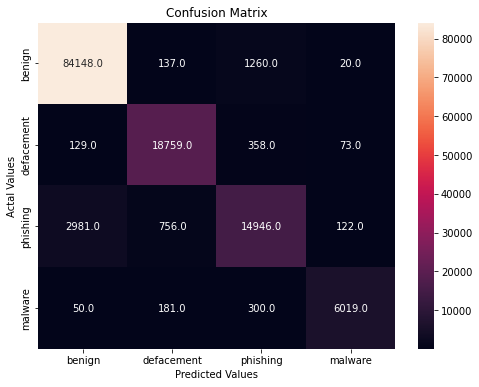

In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train.values, y_train)
pred = rfc.predict(X_test.values)
rfc_accuracy = accuracy_score(pred, y_test)
print(rfc_accuracy)

print(classification_report(y_test,pred,target_names=['benign', 'defacement','phishing','malware']))

cm = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Decision Tree Classifier

0.9484562995723247
              precision    recall  f1-score   support

      benign       0.96      0.98      0.97     85565
  defacement       0.94      0.97      0.95     19319
    phishing       0.88      0.79      0.83     18805
     malware       0.95      0.92      0.93      6550

    accuracy                           0.95    130239
   macro avg       0.93      0.91      0.92    130239
weighted avg       0.95      0.95      0.95    130239



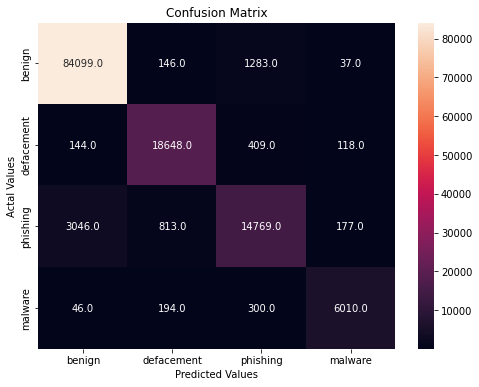

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train.values, y_train)
pred = dtc.predict(X_test.values)
dtc_accuracy = accuracy_score(pred, y_test)
print(dtc_accuracy)

print(classification_report(y_test,pred,target_names=['benign', 'defacement','phishing','malware']))

cm = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# **Implementation**

## fungsi: ekstak feature

In [28]:
def main(url):
    
    status = []
    
    status.append(abnormal_url(url))
    status.append(suspicious_words(url))
    status.append(ip_address(url))
    status.append(character(url))
    status.append(ndigit(url))
    status.append(nwww(url))
    status.append(ndir(url))
    status.append(lhostname(url))
    status.append(nhttp(url))

    return status

## fungsi: url detection

In [29]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = rfc.predict(features_test)

    if int(pred[0]) == 0:
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="PHISHING"
        return res
    elif int(pred[0]) == 3.0:
        res="MALWARE"
        return res

## testing URL

In [30]:
urls = [
    'titaniumcorporate.co.za',
    'en.wikipedia.org/wiki/North_Dakota'
    'http://www.824555.com/app/member/SportOption.php?uid=guest&langx=gb',
    'http://portal.dddgaming.com/docs/rules/15022/cn/game_cn.html?amluMjAxNQ%3D%3D',
    'http://www.0068555.com/cl/?module=System&method=LiveTop&args=livehall',
    'trtsport.cz',
    'xo3fhvm5lcvzy92q.download',
    'http://www.wu8188.com/cl/tpl/five-star/ver1/css/five-star.css?v=ver15.32',
    'http://www.vnic.co/khach-hang.html'
    ]
    
for url in urls:
     print(get_prediction_from_url(url))

PHISHING
SAFE
MALWARE
MALWARE
PHISHING
PHISHING
MALWARE
DEFACEMENT
